In [1]:
# import packages
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [14]:
# define input arguments
n_samples = 150
n_features = 2
n_clusters = 5
random_state = 10

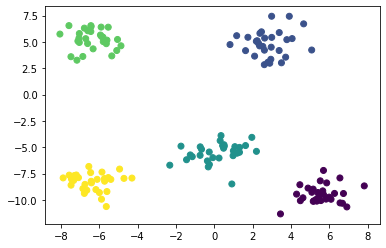

In [15]:
# create initial blobs that we will base clusters around
X, y = make_blobs(n_samples = n_samples, n_features = n_features, centers = n_clusters, random_state = random_state)


# show blobs
plt.scatter(X[:, 0], X[:, 1], c=y)

In [24]:
def plus_plus(X, n_clusters, random_state):
    '''
    parameters
    ----------
        X: numpy.ndarray: All points created by make blobs
        n_clusters: int: number of clusters we want (= centers parameter in make_blobs())
        random_state: int: desired seed for repeatable results
    returns
    ----------
        initial_centroid_points: list: randomly chosen points representing our initial centroids 
    '''
    # set seed for testing repeatability
    np.random.seed(random_state)
    
    # choose single random centroid from X
    rc = np.random.choice(len(X)-1)
    [x, y] = X[rc, 0], X[rc, 1]
    rand_centroid = np.array([x, y])
    
    # prepare output array of centroids begining with randomly selected first point
    centroids = [rand_centroid]
    # iterate through desired number of clusters
    for i in range(1, n_clusters):
        distance_square = []
        # iterate through all points
        for j in X:
            point_dist_square = []
            # find square distance between current point and given centroid
            for k in centroids:
                # np.inner returns square distsnce
                point_dist_square.append([np.inner(k-j, k-j)])
            # find which centroid is closest to current point with min square dist
            distance_square.append(min(point_dist_square))
        distance_square = np.array(distance_square)
        # find probabilities of point being next centroid candidate
        probability = distance_square/distance_square.sum()
        # Select the next centroid by choosing point with highest probability 
        cumulative_probabilities = probability.cumsum()
        rand = np.random.rand()
        for j, p in enumerate(cumulative_probabilities):
            if rand < p:
                i = j
                break
        centroids.append(X[i])
    print(centroids)
    return centroids

[array([2.60711685, 2.84436554]), array([ 1.95552599, -4.05690149]), array([-6.78056754,  6.31618938]), array([-5.5325562 , -7.87626465]), array([ 5.85943906, -8.38192364])]


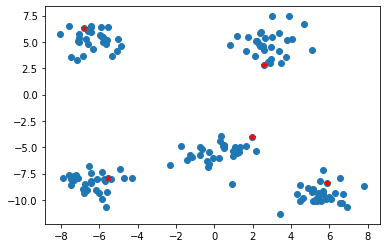

In [25]:
# get initial centroids 
initial_centroid_points = plus_plus(X, n_clusters, random_state)

# show all points with randomly selected initial centroids in red
plt.scatter(X[:, 0], X[:, 1])
for i in range(n_clusters):
    plt.plot(initial_centroid_points[i][0], initial_centroid_points[i][1], 'r*')

In [26]:
def cluster_points(X, n_clusters, initial_centroid_points):
    '''
    parameters
    ----------
        X: numpy.ndarray: of all points created by make blobs
        n_clusters: int: number of clusters we want (= number of centers parameter in make_blobs())
        initial_centroid_points: list: of randomly chosen initial centroids 
    returns
    ----------
        clusters: numpy.ndarray: of clusters. Points grouped by min distnace to closest centroid 
    '''
    # get number of desired clusters
    p = n_clusters
    # set up output list
    clusters = []
    # nest empty lists in output list based on number of clusters desired
    for n in range(p):
        points = []
        clusters.append(points)
    # iterate over every point in data set pulling x and y coordinates
    for x in X:
        x1 = x[0]
        y1 = x[1]
        # list for distances between current point and each centroid
        dists = []
        # itterate over each initial centroid to find distances to current point
        for c in initial_centroid_points:
            x2 = c[0]
            y2 = c[1]
            # find distance between current point and centroid
            d = distance_calc(x1, y1, x2, y2)
            dists.append(d)
        # find the index in distance list of minimum distance 
        # use this index to place current point in correct nested list in output list 
        index = dists.index(min(dists))
        clusters[index].append(x)
        
    # return clusters
    return np.array(clusters, dtype=object)


In [27]:
# distance calculator method using euclidian method
def distance_calc(x1, y1, ix, iy):
    '''
    parameters
    ----------
        x1, y1: numpy.float64: centroid coordinates
        ix, yx: numpy.float64: point in blob coordinates
    returns
    ----------
        distance: numpy.float64: Euclidian distance between centroid and point in blob
    '''
    d = np.sqrt(np.square(x1 - ix) + np.square(y1 - iy))
    return d

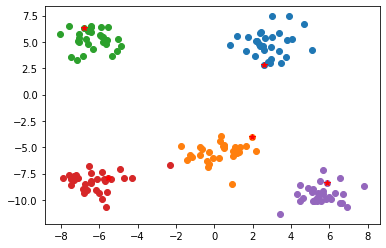

In [28]:
# find clusters based on all points (X) and initial random selected centroids (points)
#c1, c2 = cluster(X, initial_centroid_points)

first_cluster = cluster_points(X, n_clusters, initial_centroid_points)

ind = 0
for i in first_cluster:
    plt.scatter(np.stack(i, axis=0)[:, 0], np.stack(i, axis=0)[:, 1])
    plt.plot(initial_centroid_points[ind][0], initial_centroid_points[ind][1], 'r*')
    ind += 1

In [29]:
# find true centroid 
def true_centroid(clusters):
    '''
    parameters
    ----------
        clusters: nimpy.ndarray: collection of points in cluster
    returns
    ----------
        mean distance: list: mean x and y position of points in cluster
    '''
    new_centroid_points = []
    for i in clusters:
        # take x and y coordinates of each point in cluseter
        x = []
        y = []
        for j in i:
            x.append(j[0])
            y.append(j[1])
        # find mean position of these points
        x_mean = np.mean(x[:])
        y_mean = np.mean(y[:])
        # return as point that we will use as new centroid
        points = [x_mean, y_mean]
        new_centroid_points.append(points)
    # output 
    return new_centroid_points
  

In [30]:
# get first round optimized centroid points
new_centroid_points = true_centroid(first_cluster)

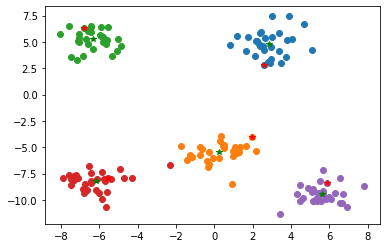

In [31]:
# show first cluster set with first optimized centroids
ind = 0
for i in first_cluster:
    plt.scatter(np.stack(i, axis=0)[:, 0], np.stack(i, axis=0)[:, 1])
    plt.plot(initial_centroid_points[ind][0], initial_centroid_points[ind][1], 'r*')
    plt.plot(new_centroid_points[ind][0], new_centroid_points[ind][1], 'g*')
    ind += 1

In [32]:
# now we have our first clusters and first round optimized centroids
# we will loop over the same process to adjust the position of the centroids
# and the members of each cluster untill we find no change in memberd and positions
count = 0
for x in range(5000):
    itter_centroid_points = []
    # find new clusters with newly found centroid
    clusters = cluster_points(X, n_clusters, new_centroid_points)
    # find new centroid based on new clusters with true_centroid() method
    itter_centroid_points = true_centroid(clusters)
    # detect if there is any change in centroids to find number of itterations
    if itter_centroid_points != new_centroid_points:
        count+=1
    # reset centroids and find new clusters
    new_centroid_points = itter_centroid_points

# show number of itterations needed to optimize
print(count)
print(new_centroid_points)

1
[[2.8265822867088537, 4.816435051736419], [0.16708770948067284, -5.509507803494118], [-6.3313409625968795, 5.2392251950766555], [-6.327864063045149, -8.293859490064046], [5.58979223102932, -9.47728671196168]]


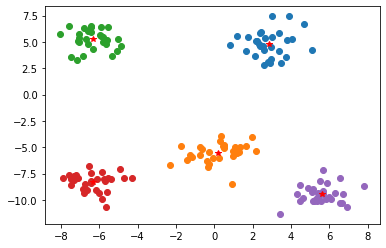

In [33]:
ind = 0
for i in clusters:
    plt.scatter(np.stack(i, axis=0)[:, 0], np.stack(i, axis=0)[:, 1])
    plt.plot(new_centroid_points[ind][0], new_centroid_points[ind][1], 'r*')
    ind += 1
